In [1]:
#! /usr/bin/python3
# author : Priyanshu Shrivastav (from IIT Palakkad, India)

import numpy as np, matplotlib.pyplot as plt
import csv, sys
from sklearn.preprocessing import MinMaxScaler

file_name = input("file index : ")
DATA_SIZE = 10000
PARAMETER_COUNT = 2
TRAIN_DATA_SET  = "Train" + file_name + ".csv"
TEST_DATA_SET   = "Test" + file_name + ".csv"
ALPHA           = 0.001

train_sz, test_sz, loss = 0, 0, []
X = np.ndarray((DATA_SIZE, PARAMETER_COUNT + 1)) # +1 for bias
Y = np.zeros(DATA_SIZE, dtype=int)
W = np.ndarray(PARAMETER_COUNT + 1)
min_max_scaler = MinMaxScaler()

class Perceptron:
    # Take training input data
    def take_training_input(self):
        global train_sz
        train_sz = 0
        with open(TRAIN_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[train_sz][p] = float(row[p])
                X[train_sz][PARAMETER_COUNT] = 1.0
                Y[train_sz] = float(row[PARAMETER_COUNT])
                if Y[train_sz] == 0:
                    Y[train_sz] = -1
                train_sz += 1

# plot training data data
    def show_data(self, title, xlab="", ylab=""):
        print('=== Data points given to train : {sz} ==='.format(sz=train_sz))
        plt.title(title)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        for train_data_index in range(train_sz):
            if (Y[train_data_index] == 1):
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'bo')
            else:
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'ro')

# find weights
    def find_weights(self):
        global train_sz, W, loss
        print("================================       TRAINING       ==================================")
        print("Training data size : {tz}".format(tz=train_sz))
        W = np.random.random(PARAMETER_COUNT + 1)
        ok = False
        epoch = 0
        while ok is False:
            if epoch > 500: # linear classification not possible
                break
            W_old, x_add, y_real = np.copy(W), [], 0
            epoch += 1
            ok = True
            err_cnt = 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and Y[tc] < 0):
                    x_add = np.copy(-1*X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                elif (y_hat < 0 and Y[tc] > 0):
                    x_add = np.copy(X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                loss.append(err_cnt)

            err_pos, err_neg, tp, tn = 0, 0, 0, 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and y_real < 0):
                    err_neg += 1
                elif (y_hat < 0 and y_real > 0):
                    err_pos += 1
                elif (y_real > 0):
                    tp += 1
                elif (y_real < 0):
                    tn += 1

            print("----------------------------------------------------------------------------------------")
            print("[ Epoch : {epoch} ], [ error count : {err} ]".format(epoch=epoch, err=err_cnt))
            print("W_old : {w_old}".format(w_old=W_old))
            print("W_new : {w_new}".format(w_new=W))
            print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
            print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))

    def draw_line_2d(self):
        global train_sz, W
        mx_x1, mx_x2 = -1e9, -1e9
        mn_x1, mn_x2 = 1e9, 1e9
        for tc in range(train_sz):
            mx_x1 = max(mx_x1, X[tc][0])
            mn_x1 = min(mn_x1, X[tc][0])
        X1 = np.linspace(mn_x1, mx_x1, 1000)
        # 0 = w[0]*x[0] + w[1]*x[1] + w[2]*x[3]
        X2 = []
        for x in X1:
            X2.append(-1*(W[0]*x + W[2]*1.0)/W[1])
        plt.plot(X1, X2)


    def take_test_input(self):
        global test_sz, X, Y
        test_sz = 0
        with open(TEST_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[test_sz][p] = float(row[p])
                X[test_sz][PARAMETER_COUNT] = 1.0
                Y[test_sz] = float(row[PARAMETER_COUNT])
                if Y[test_sz] == 0:
                    Y[test_sz] = -1
                test_sz += 1

    def test(self):
        global test_sz, X, Y, loss, W
        print("================================       TESTING        ==================================")
        print("Test Data size : ", test_sz)
        loss, err_pos, err_neg, tp, tn = [], 0, 0, 0, 0
        for tc in range(test_sz):
            y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
            if (y_hat > 0 and y_real < 0):
                err_neg += 1
            elif (y_hat < 0 and y_real > 0):
                err_pos += 1
            elif (y_real > 0):
                tp += 1
            elif (y_real < 0):
                tn += 1
        print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
        print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))
        print("============================         TESTING FINISHED          =========================")

    def draw_error_count(self):
        global loss, train_sz
        ep = [epoch + 1 for epoch in range(len(loss))]
        accuracy = [train_sz - x for x in loss]
        plt.title("Classification Error v/s iterations")
        plt.ylabel("Classification Error")
        plt.xlabel("Iterations")
        plt.plot(ep, loss, 'r')
        plt.show()

        plt.title("Classification Accuracy v/s iterations")
        plt.ylabel("Classification Accuracy")
        plt.xlabel("Iterations")
        plt.plot(ep, accuracy, 'b')
        plt.show()

file index : 5


In [2]:
t = Perceptron()
t.take_training_input()

In [3]:
t.find_weights()

================================       TRAINING       ==================================
Training data size : 960
----------------------------------------------------------------------------------------
[ Epoch : 1 ], [ error count : 246 ]
W_old : [0.07061648 0.38390857 0.73562955]
W_new : [-0.07625467  0.58800593  0.49162955]
True positive : 481, False positive : 103
True negative : 374, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 2 ], [ error count : 65 ]
W_old : [-0.07625467  0.58800593  0.49162955]
W_new : [-0.07380173  0.62233377  0.43062955]
True positive : 481, False positive : 44
True negative : 433, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 3 ], [ error count : 38 ]
W_old : [-0.07380173  0.62233377  0.43062955]
W_new : [-0.06606509  0.63783841  0.39662955]
True positive : 481, False positive : 29
True negative : 448, False negati

----------------------------------------------------------------------------------------
[ Epoch : 32 ], [ error count : 5 ]
W_old : [0.06838724 0.60377125 0.26062955]
W_new : [0.07186814 0.60073422 0.25962955]
True positive : 481, False positive : 3
True negative : 474, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 33 ], [ error count : 5 ]
W_old : [0.07186814 0.60073422 0.25962955]
W_new : [0.07534904 0.59769718 0.25862955]
True positive : 481, False positive : 2
True negative : 475, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 34 ], [ error count : 4 ]
W_old : [0.07534904 0.59769718 0.25862955]
W_new : [0.07810763 0.59431589 0.25862955]
True positive : 481, False positive : 2
True negative : 475, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 35 ], [ error count : 4 ]
W_

----------------------------------------------------------------------------------------
[ Epoch : 68 ], [ error count : 5 ]
W_old : [0.16184489 0.48702609 0.25462955]
W_new : [0.16311662 0.48462366 0.25362955]
True positive : 481, False positive : 3
True negative : 474, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 69 ], [ error count : 5 ]
W_old : [0.16311662 0.48462366 0.25362955]
W_new : [0.16438834 0.48222123 0.25262955]
True positive : 481, False positive : 3
True negative : 474, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 70 ], [ error count : 6 ]
W_old : [0.16438834 0.48222123 0.25262955]
W_new : [0.16408323 0.48088605 0.25062955]
True positive : 481, False positive : 3
True negative : 474, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 71 ], [ error count : 5 ]
W_

----------------------------------------------------------------------------------------
[ Epoch : 98 ], [ error count : 6 ]
W_old : [0.15607707 0.43445973 0.21662955]
W_new : [0.1544939  0.43358229 0.21462955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 99 ], [ error count : 5 ]
W_old : [0.1544939  0.43358229 0.21462955]
W_new : [0.15438707 0.43166079 0.21362955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 100 ], [ error count : 5 ]
W_old : [0.15438707 0.43166079 0.21362955]
W_new : [0.15428023 0.42973928 0.21262955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 101 ], [ error count : 5 ]


----------------------------------------------------------------------------------------
[ Epoch : 132 ], [ error count : 5 ]
W_old : [0.13629408 0.37515691 0.18262955]
W_new : [0.13618724 0.3732354  0.18162955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 133 ], [ error count : 5 ]
W_old : [0.13618724 0.3732354  0.18162955]
W_new : [0.13483246 0.37177926 0.18062955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 134 ], [ error count : 4 ]
W_old : [0.13483246 0.37177926 0.18062955]
W_new : [0.13495402 0.36927905 0.18062955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 135 ], [ error count : 5 

----------------------------------------------------------------------------------------
[ Epoch : 166 ], [ error count : 4 ]
W_old : [0.113854   0.3148908  0.15262955]
W_new : [0.11397555 0.31239059 0.15262955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 167 ], [ error count : 4 ]
W_old : [0.11397555 0.31239059 0.15262955]
W_new : [0.11302235 0.31031119 0.15262955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 168 ], [ error count : 5 ]
W_old : [0.11302235 0.31031119 0.15262955]
W_new : [0.11049231 0.30929903 0.15162955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 169 ], [ error count : 5 

----------------------------------------------------------------------------------------
[ Epoch : 202 ], [ error count : 5 ]
W_old : [0.09004953 0.25011902 0.12362955]
W_new : [0.08886794 0.24861831 0.12262955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 203 ], [ error count : 5 ]
W_old : [0.08886794 0.24861831 0.12262955]
W_new : [0.0888616  0.24667362 0.12162955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 204 ], [ error count : 5 ]
W_old : [0.0888616  0.24667362 0.12162955]
W_new : [0.08768001 0.24517291 0.12062955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 205 ], [ error count : 5 

----------------------------------------------------------------------------------------
[ Epoch : 238 ], [ error count : 5 ]
W_old : [0.06628295 0.1865403  0.09262955]
W_new : [0.06510135 0.1850396  0.09162955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 239 ], [ error count : 5 ]
W_old : [0.06510135 0.1850396  0.09162955]
W_new : [0.06509502 0.18309491 0.09062955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 240 ], [ error count : 5 ]
W_old : [0.06509502 0.18309491 0.09062955]
W_new : [0.06391342 0.1815942  0.08962955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 241 ], [ error count : 5 

----------------------------------------------------------------------------------------
[ Epoch : 268 ], [ error count : 4 ]
W_old : [0.04679864 0.1340112  0.06562955]
W_new : [0.04584543 0.13193179 0.06562955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 269 ], [ error count : 5 ]
W_old : [0.04584543 0.13193179 0.06562955]
W_new : [0.04466384 0.13043109 0.06462955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 270 ], [ error count : 5 ]
W_old : [0.04466384 0.13043109 0.06462955]
W_new : [0.0446575  0.1284864  0.06362955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 271 ], [ error count : 5 

----------------------------------------------------------------------------------------
[ Epoch : 302 ], [ error count : 5 ]
W_old : [0.0266728  0.07395677 0.03562955]
W_new : [0.02618154 0.07227039 0.03462955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 303 ], [ error count : 5 ]
W_old : [0.02618154 0.07227039 0.03462955]
W_new : [0.02569028 0.07058401 0.03362955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 304 ], [ error count : 5 ]
W_old : [0.02569028 0.07058401 0.03362955]
W_new : [0.02385058 0.06938618 0.03262955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 305 ], [ error count : 4 

----------------------------------------------------------------------------------------
[ Epoch : 339 ], [ error count : 5 ]
W_old : [0.00411979 0.01073039 0.00462955]
W_new : [0.00362392 0.00920666 0.00362955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 340 ], [ error count : 5 ]
W_old : [0.00362392 0.00920666 0.00362955]
W_new : [0.00312804 0.00768292 0.00262955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 341 ], [ error count : 5 ]
W_old : [0.00312804 0.00768292 0.00262955]
W_new : [0.00263217 0.00615919 0.00162955]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 342 ], [ error count : 6 

----------------------------------------------------------------------------------------
[ Epoch : 369 ], [ error count : 7 ]
W_old : [-7.09031640e-05  2.44331459e-03 -3.70451600e-04]
W_new : [-0.00047337  0.00218111  0.00062955]
True positive : 481, False positive : 4
True negative : 473, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 370 ], [ error count : 8 ]
W_old : [-0.00047337  0.00218111  0.00062955]
W_new : [-0.00071706  0.00240993  0.00062955]
True positive : 481, False positive : 4
True negative : 473, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 371 ], [ error count : 7 ]
W_old : [-0.00071706  0.00240993  0.00062955]
W_new : [-5.13646244e-05  2.48760751e-03 -3.70451600e-04]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 400 ], [ error count : 7 ]
W_old : [-0.00094319  0.00232647  0.00062955]
W_new : [-0.00027749  0.00240415 -0.00037045]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 401 ], [ error count : 7 ]
W_old : [-0.00027749  0.00240415 -0.00037045]
W_new : [-0.00067995  0.00214195  0.00062955]
True positive : 481, False positive : 5
True negative : 472, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 402 ], [ error count : 8 ]
W_old : [-0.00067995  0.00214195  0.00062955]
W_new : [-0.00092365  0.00237076  0.00062955]
True positive : 481, False positive : 5
True negative : 472, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 403 ], 

----------------------------------------------------------------------------------------
[ Epoch : 448 ], [ error count : 8 ]
W_old : [-0.00050032  0.0023006   0.00062955]
W_new : [-0.00074402  0.00252942  0.00062955]
True positive : 481, False positive : 4
True negative : 473, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 449 ], [ error count : 7 ]
W_old : [-0.00074402  0.00252942  0.00062955]
W_new : [-7.83148107e-05  2.60709709e-03 -3.70451600e-04]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 450 ], [ error count : 7 ]
W_old : [-7.83148107e-05  2.60709709e-03 -3.70451600e-04]
W_new : [-0.00048078  0.0023449   0.00062955]
True positive : 481, False positive : 3
True negative : 474, False negative : 2
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 484 ], [ error count : 7 ]
W_old : [-0.00088623  0.00273972  0.00062955]
W_new : [-0.00022053  0.0028174  -0.00037045]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 485 ], [ error count : 7 ]
W_old : [-0.00022053  0.0028174  -0.00037045]
W_new : [-0.00082979  0.0025244   0.00062955]
True positive : 481, False positive : 5
True negative : 472, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 486 ], [ error count : 7 ]
W_old : [-0.00082979  0.0025244   0.00062955]
W_new : [-0.00016409  0.00260207 -0.00037045]
True positive : 481, False positive : 1
True negative : 476, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 487 ], 

=== Data points given to train : 960 ===


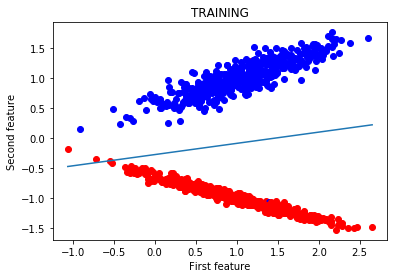

In [4]:
t.show_data("TRAINING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()


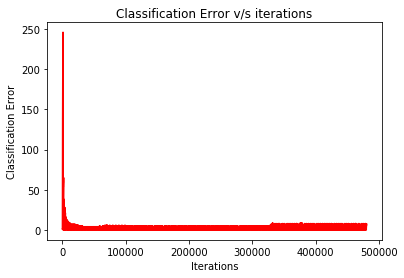

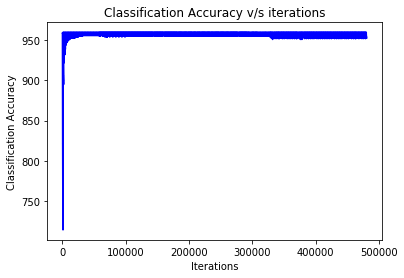

In [5]:
t.draw_error_count()

In [6]:
t.take_test_input()
t.test()

================================       TESTING        ==================================
Test Data size :  240
True positive : 118, False positive : 2
True negative : 120, False negative : 0
============================         TESTING FINISHED          =========================


=== Data points given to train : 960 ===


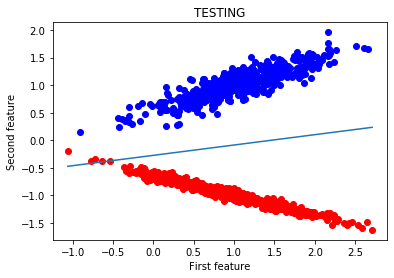

In [7]:
t.show_data("TESTING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()

In [8]:
# Data was almost linearly seperable and hence Perceptron works almost correct
